<a href="https://colab.research.google.com/github/Mahalak4401/Deep-Learning-projects/blob/main/Breast_Cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BREAST CANCER CLASSIFICATION USING ARTIFICIAL NEURAL NETWORK



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


DOWNLOADING DATASET

In [ ]:
breast_cancer=pd.read_csv('/content/breast-cancer.csv')
breast_cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


EXPLORATIVE DATA ANALYSIS


In [ ]:
#getting information about the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#checking null values
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#drop the column
breast_cancer.drop(['id'],axis=1,inplace=True)

In [ ]:
#statistical information about dataset
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#shape of the dataset
breast_cancer.shape

(569, 31)

In [ ]:
# encoding the target column
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

labels = label_encode.fit_transform(breast_cancer['diagnosis'])

breast_cancer['target'] = labels

breast_cancer.drop(columns='diagnosis', axis=1, inplace=True)

In [ ]:
#checking the distribution of Target variable
breast_cancer['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

0 - benign
1 - malignant

**DATA VISUALIZATION**

<Axes: xlabel='target', ylabel='count'>

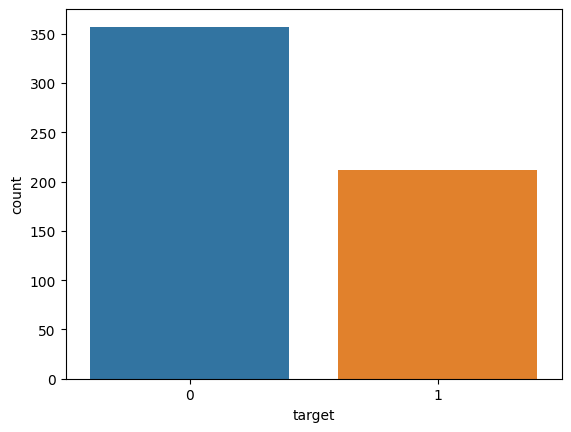

In [ ]:
#countplot for the target column
sns.countplot(x='target',data=breast_cancer)

In [ ]:
correlation_matrix = breast_cancer.corr()

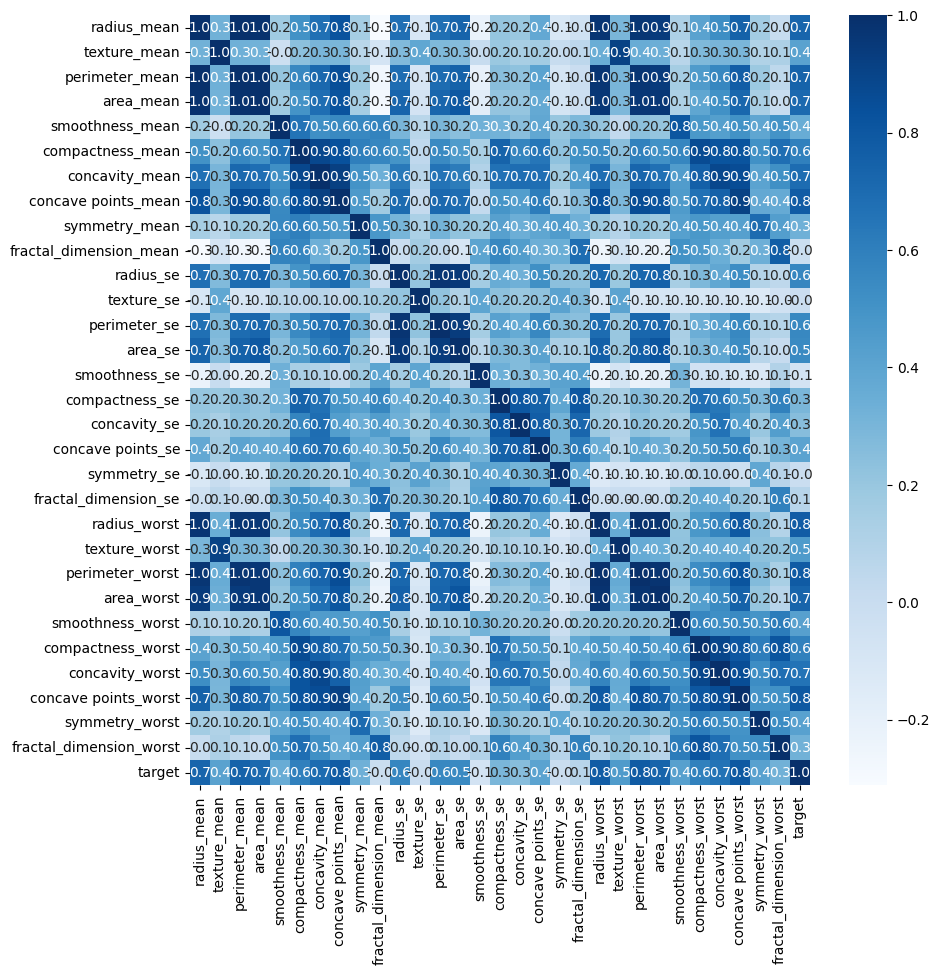

In [ ]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues' )
plt.show()

In [ ]:
breast_cancer.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

In [ ]:
mean_features = list(breast_cancer.columns[1:11])
se_features = list(breast_cancer.columns[11:21])
worst_features = list(breast_cancer.columns[21:31])

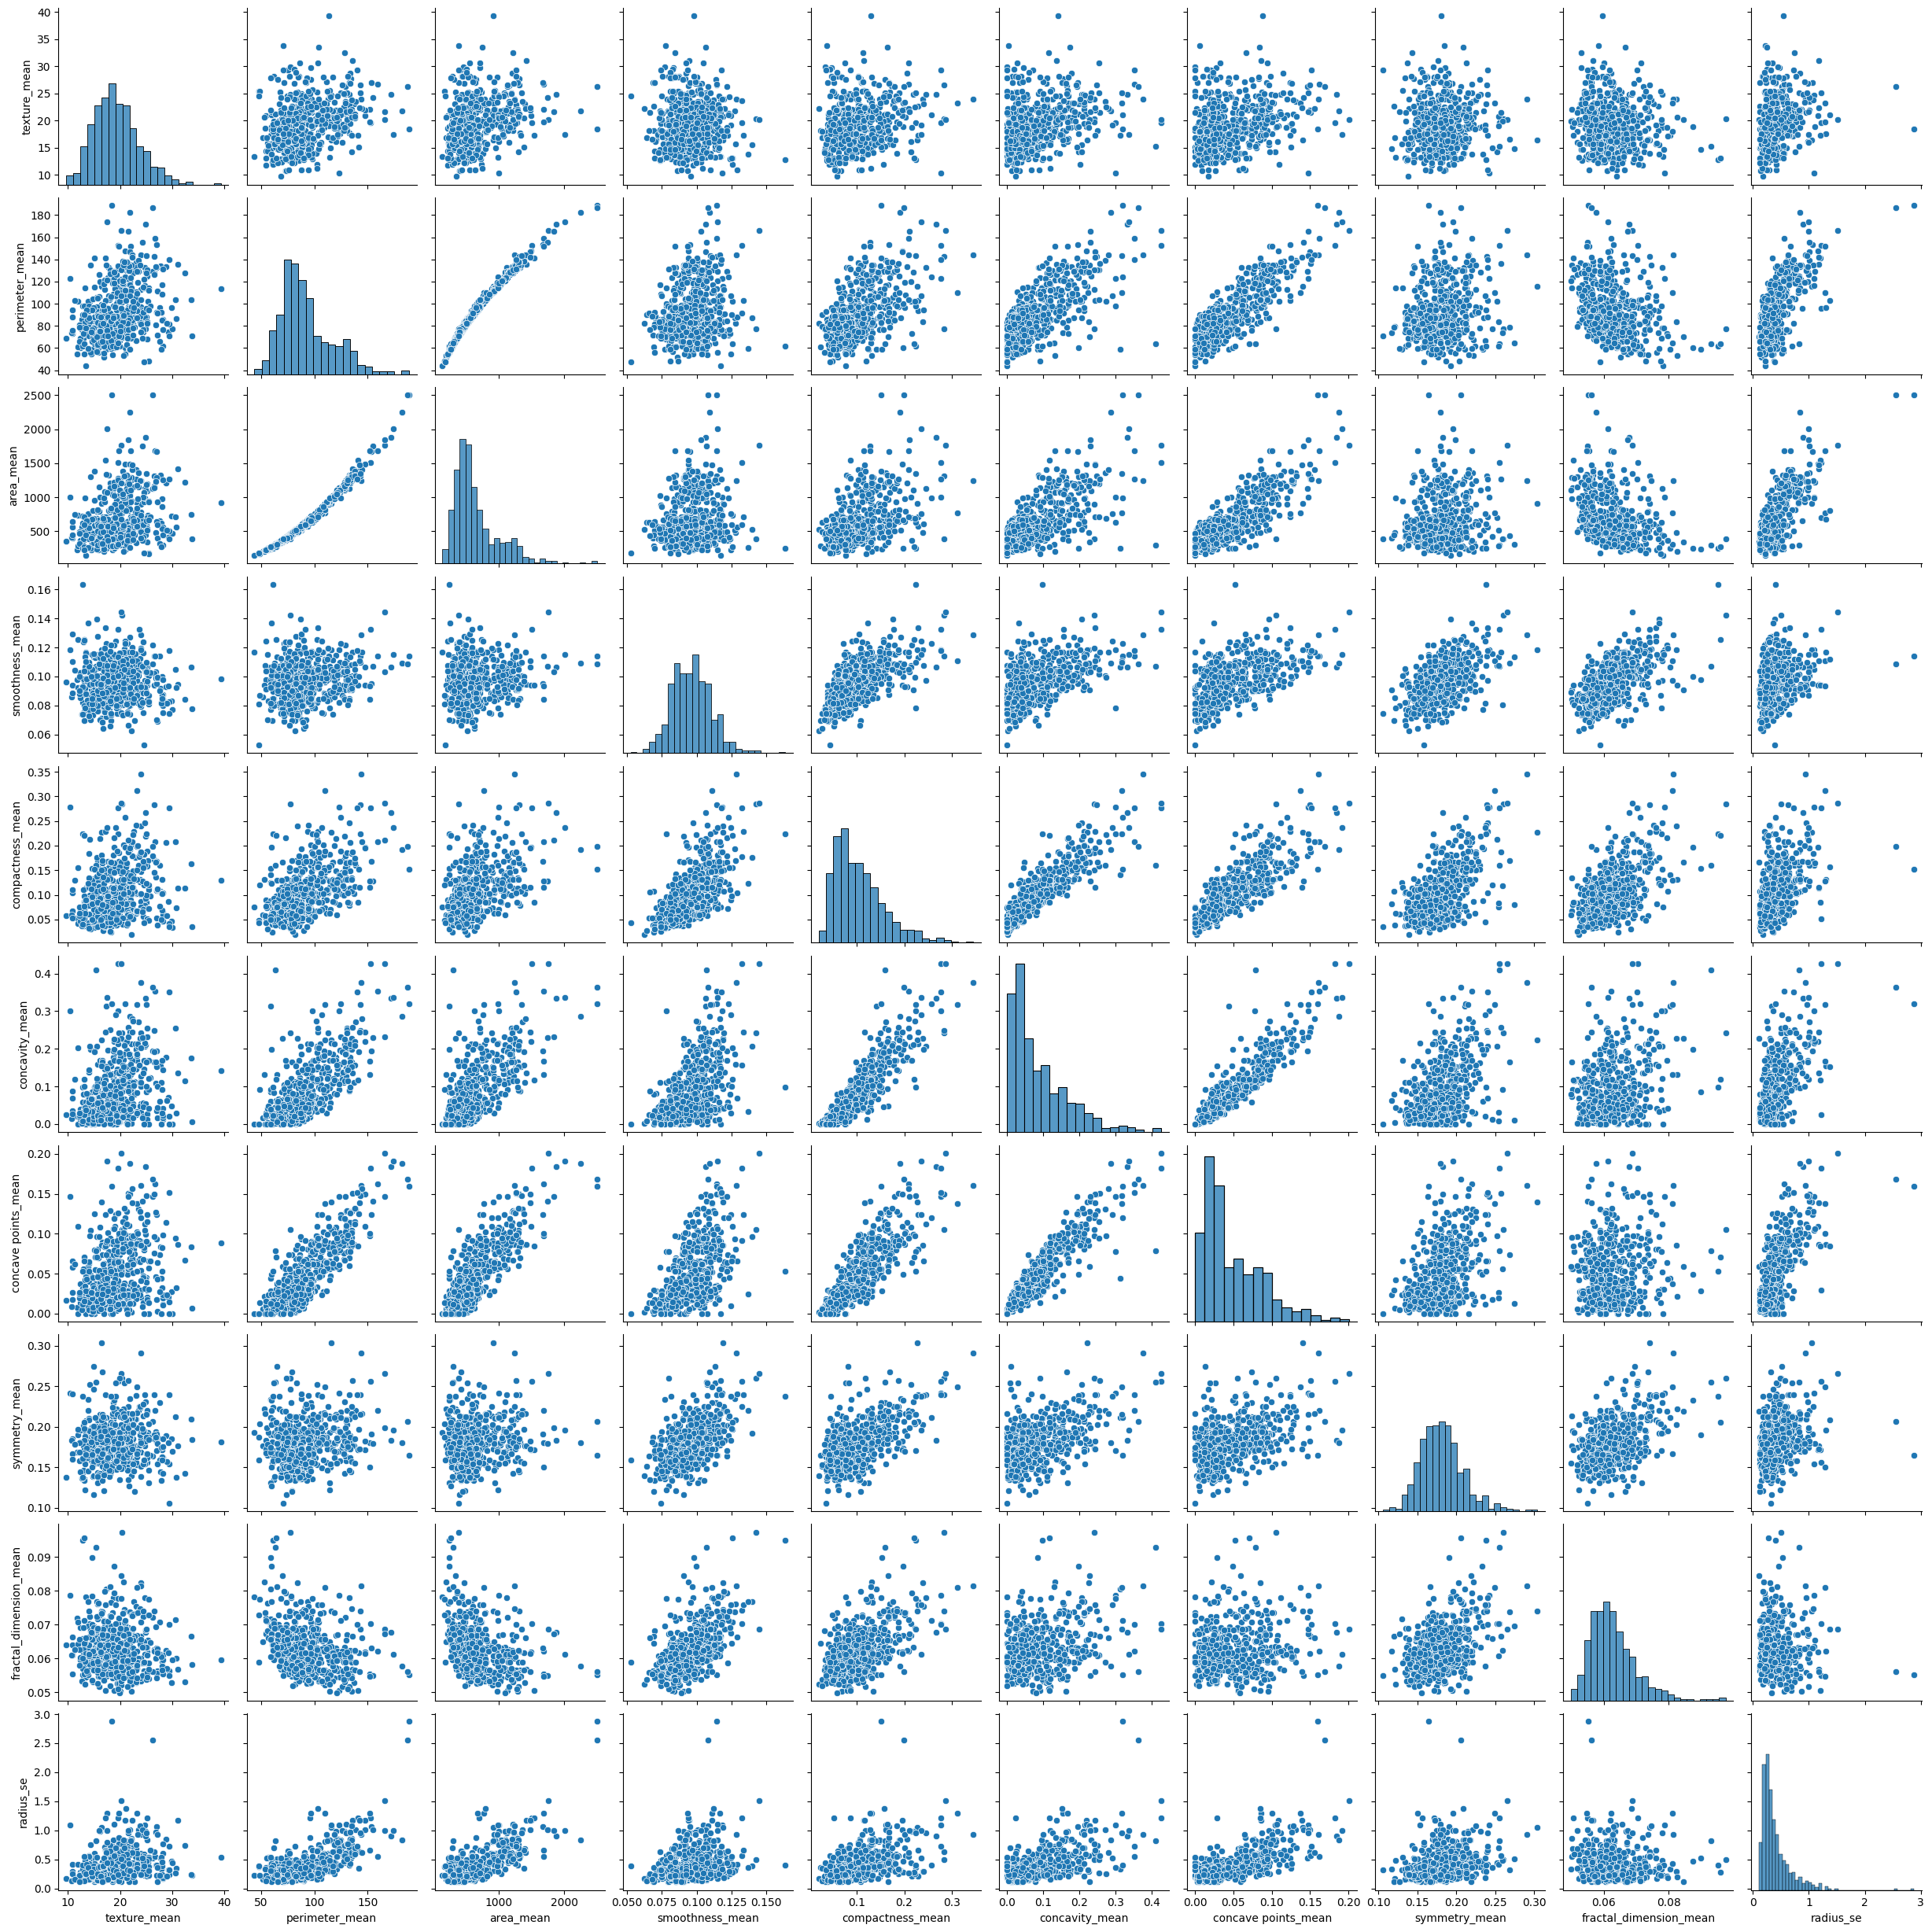

In [ ]:
#pairplot
sns.pairplot(breast_cancer[mean_features])

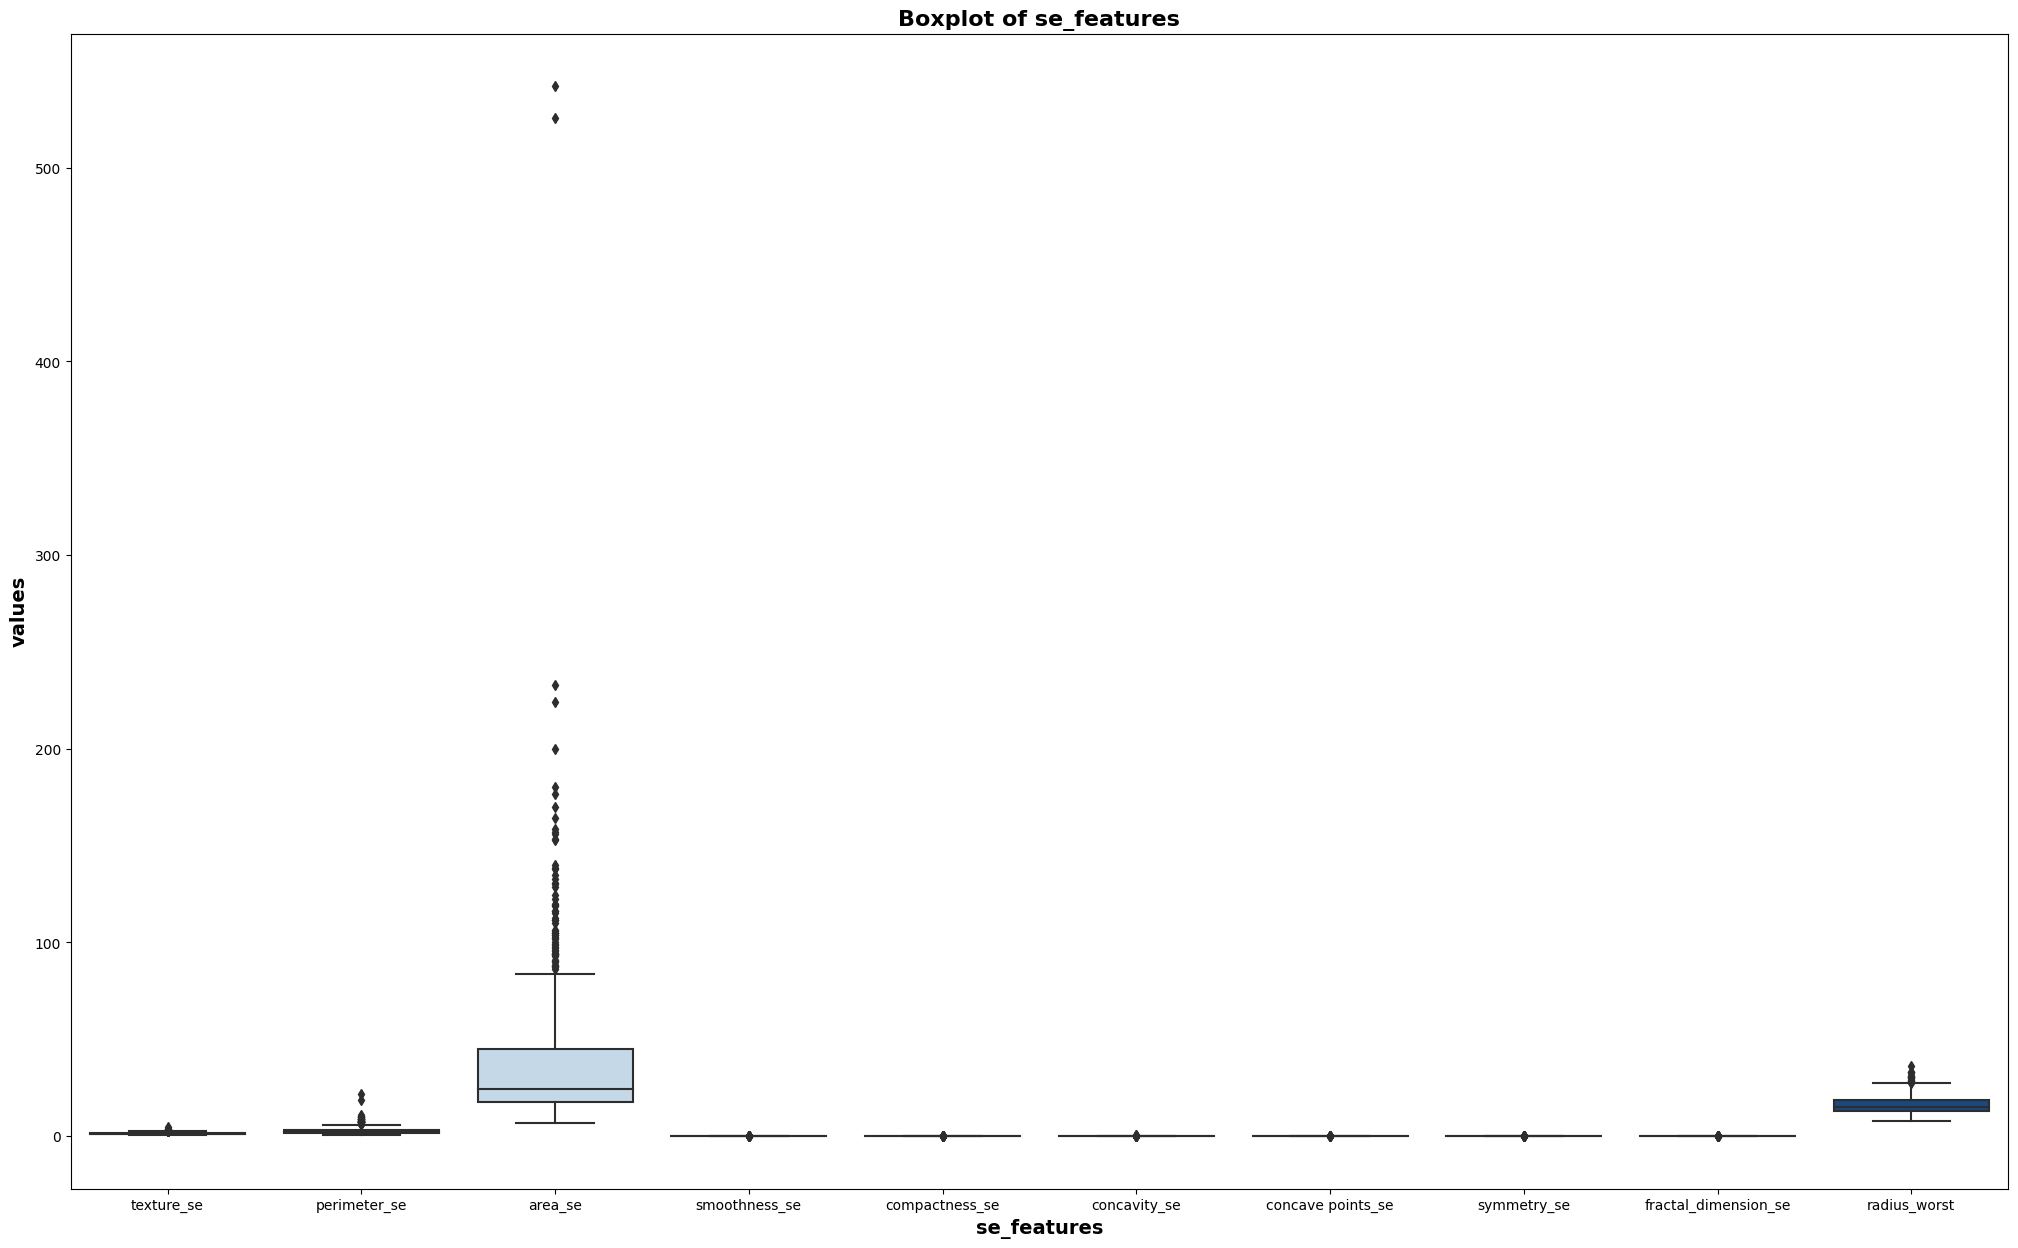

In [ ]:
plt.figure(figsize=(25,15))
p = sns.boxplot(breast_cancer[se_features], palette='Blues')
p.set_xlabel('se_features', fontsize= 14, fontweight='bold')
p.set_ylabel('values', fontsize= 14, fontweight='bold')
p.set_title('Boxplot of se_features', fontsize= 16, fontweight='bold');

<Axes: >

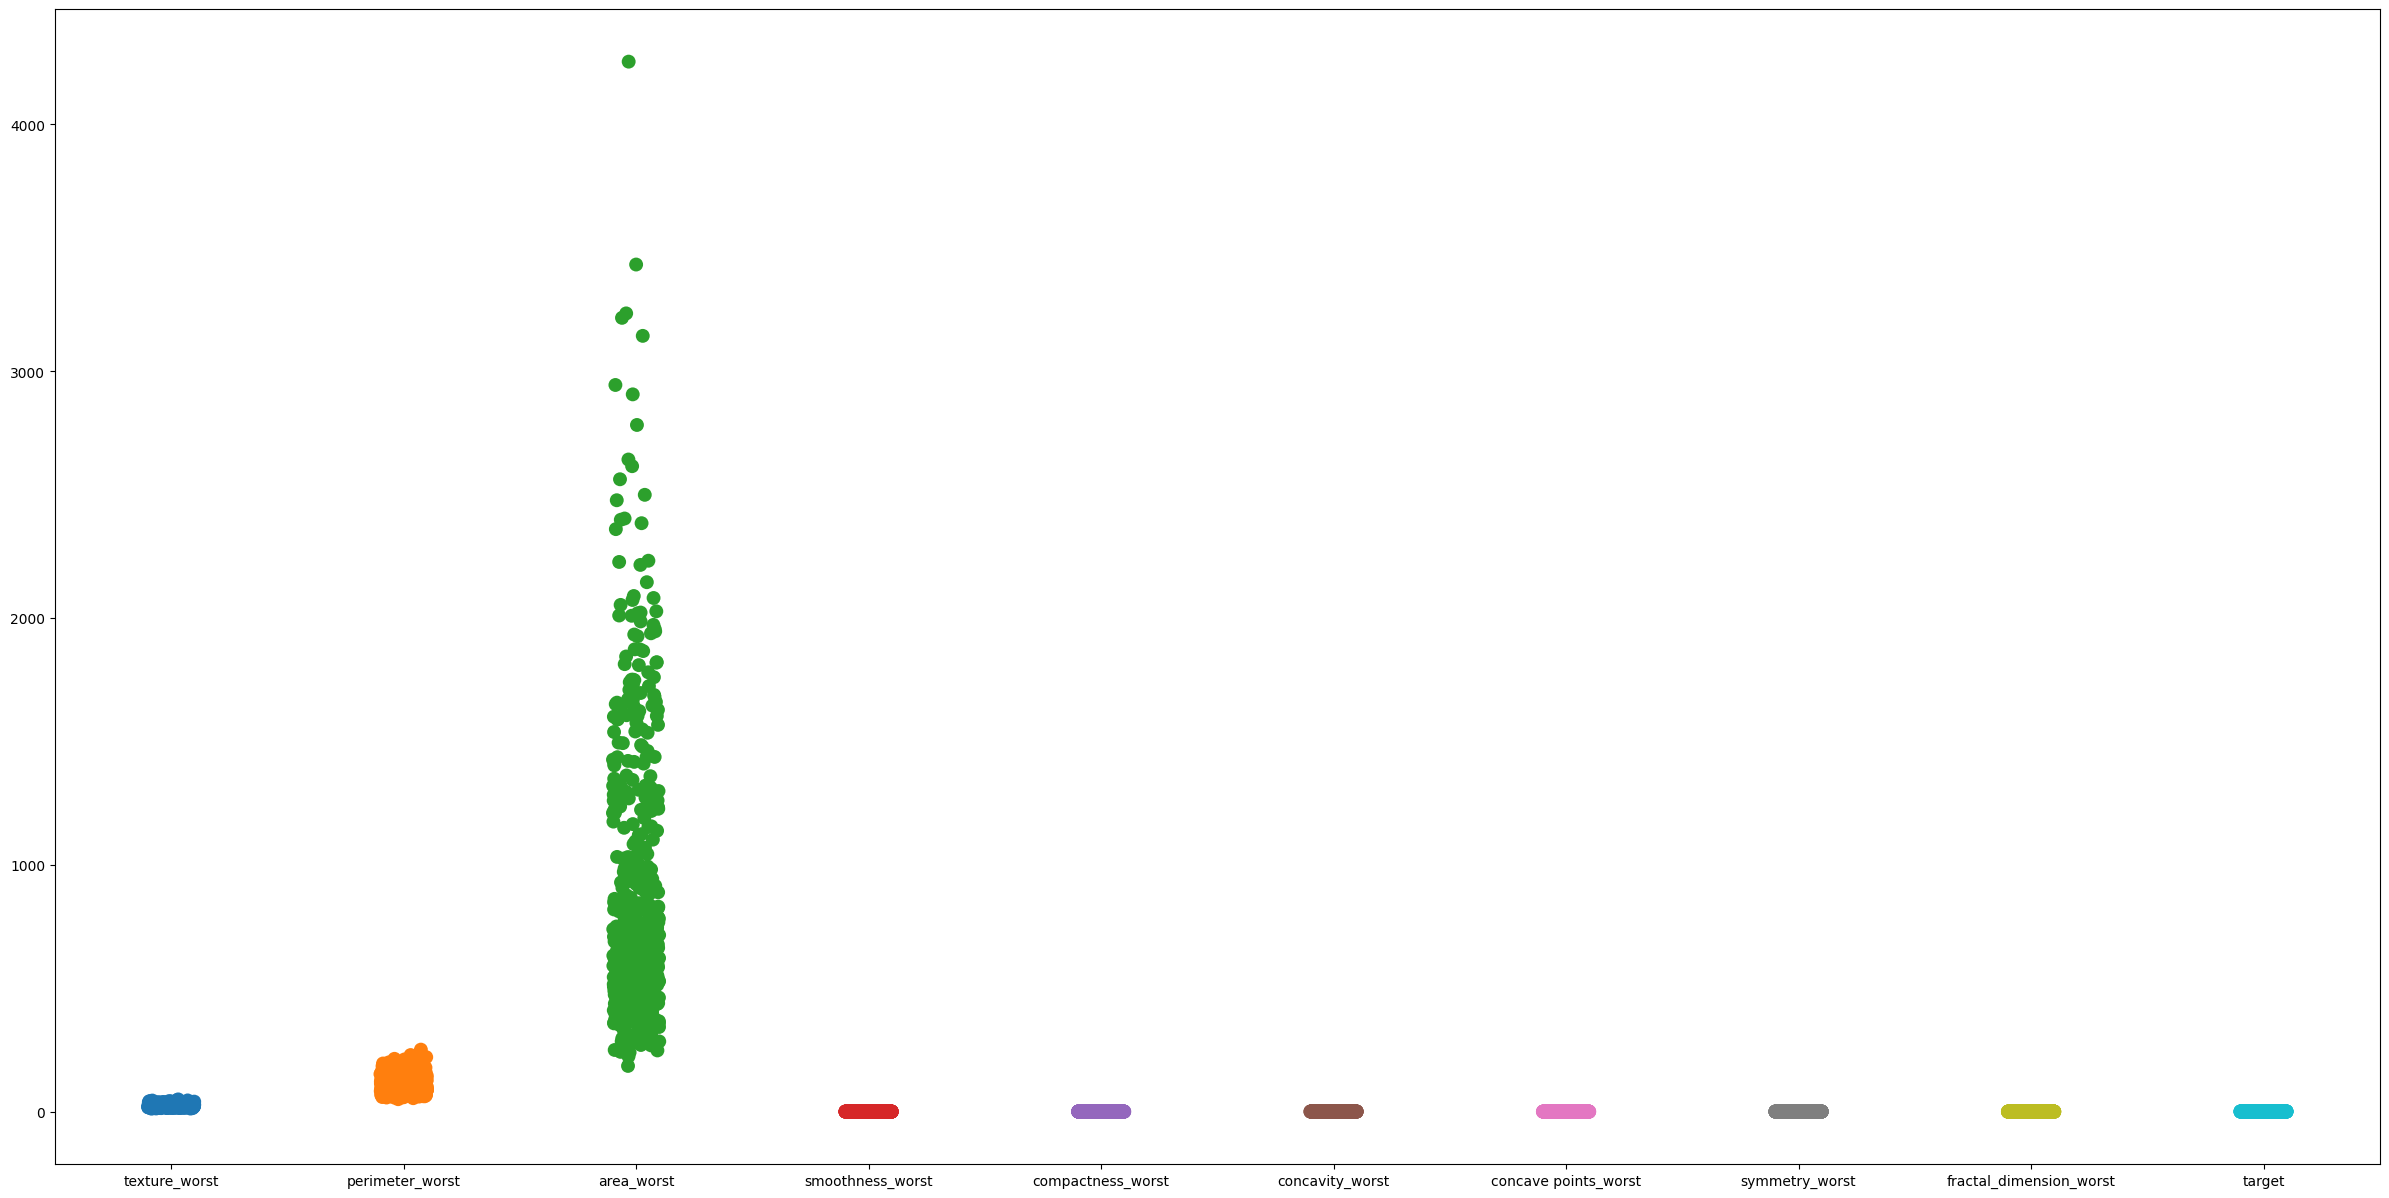

In [ ]:
plt.figure(figsize=(30,15))
sns.stripplot(breast_cancer[worst_features],size=10)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


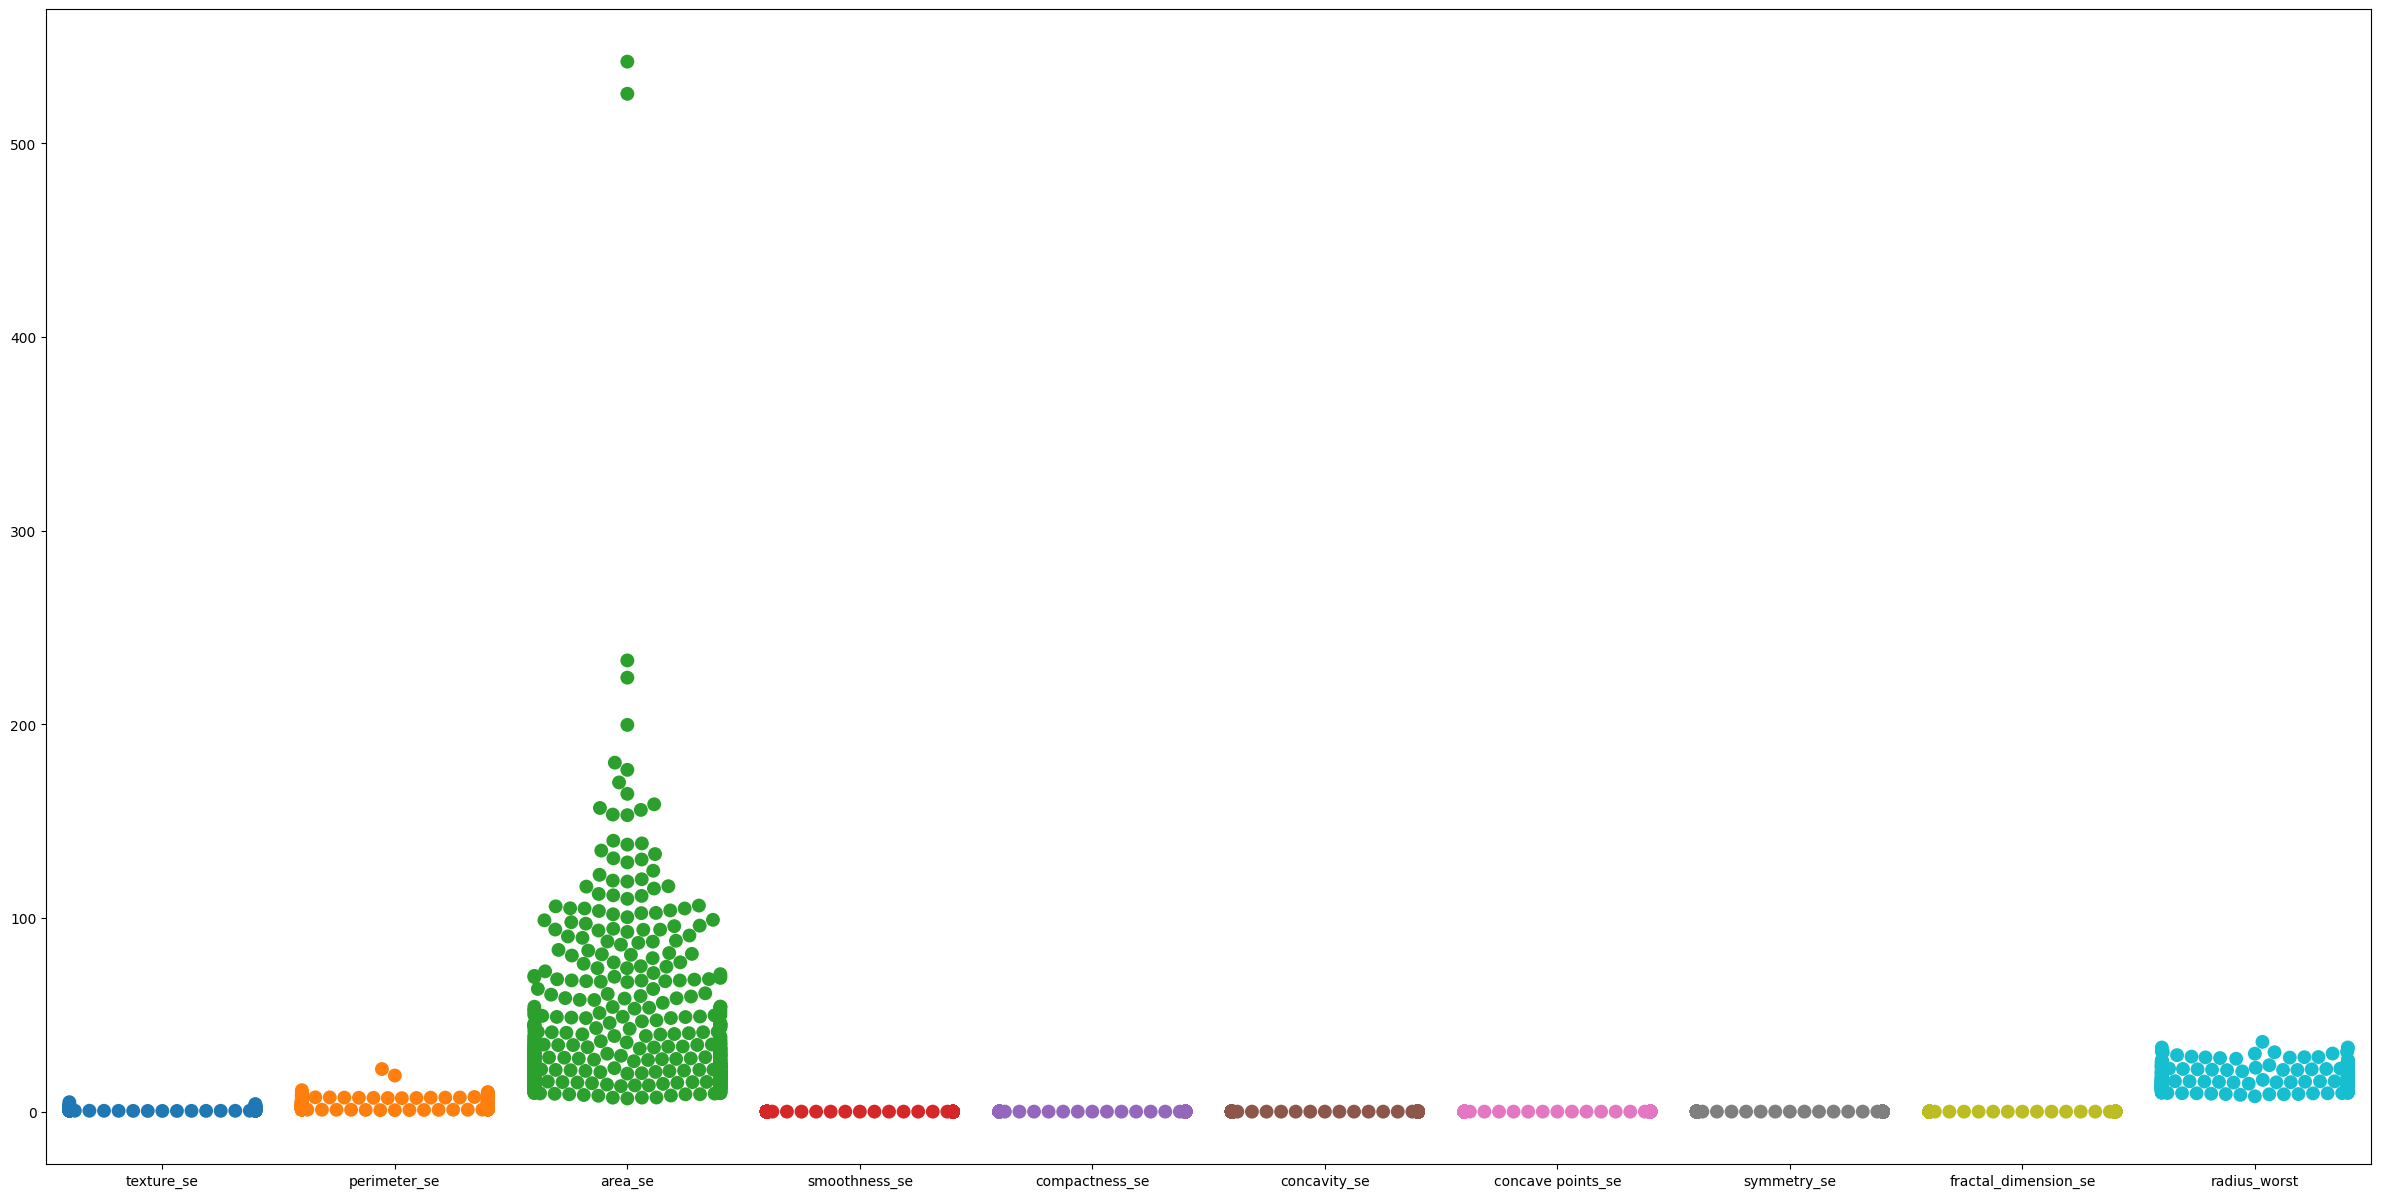

In [ ]:
plt.figure(figsize=(30,15))
sns.swarmplot(breast_cancer[se_features],size=10)

<Axes: >

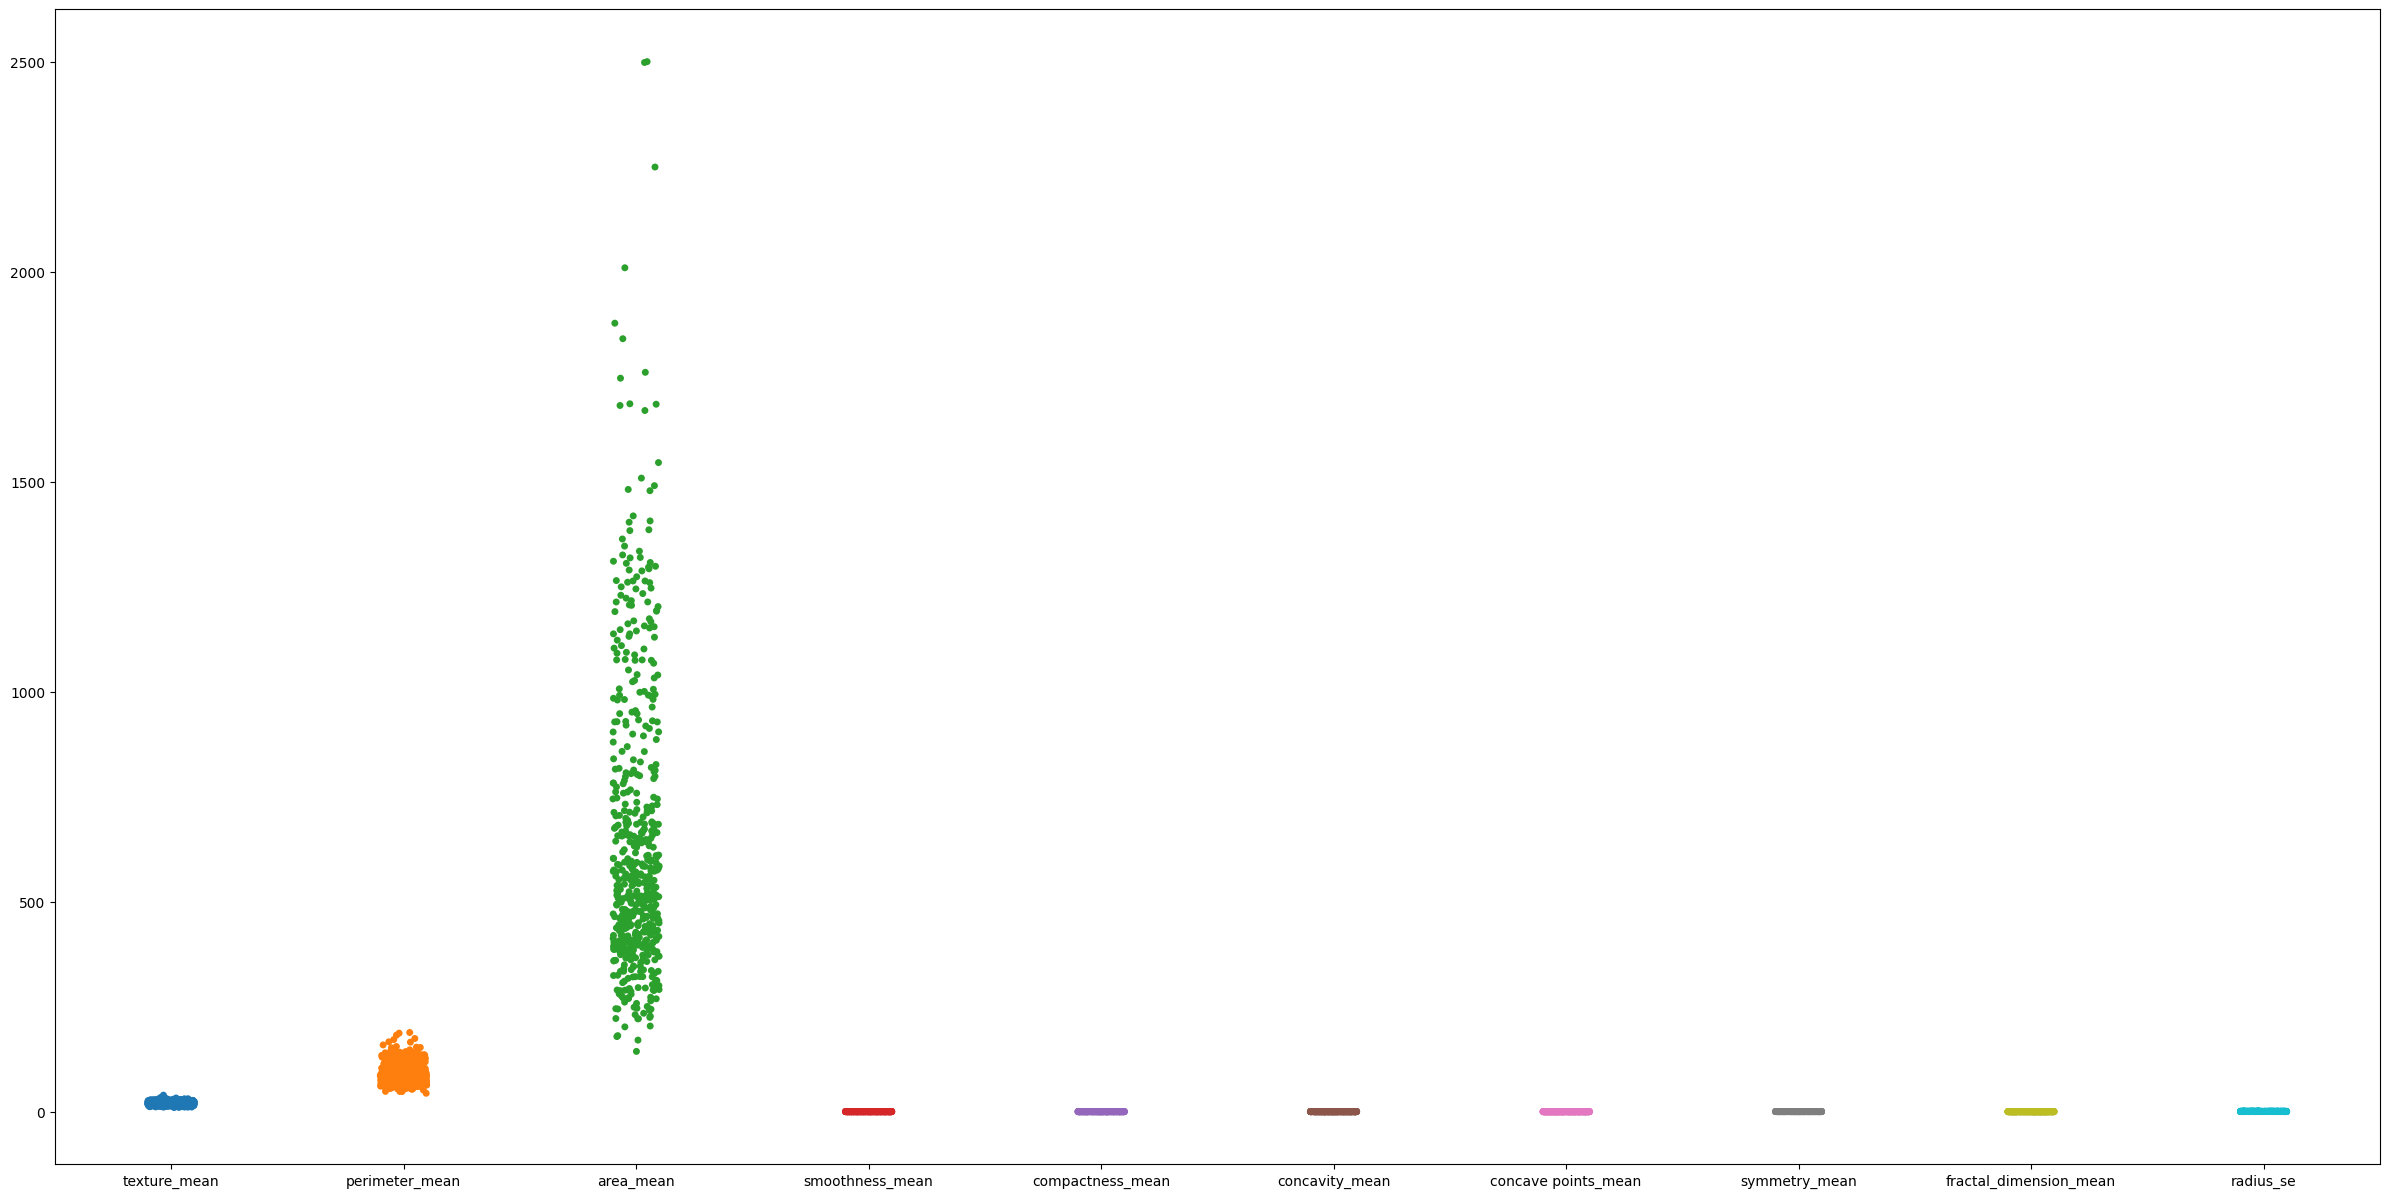

In [ ]:
plt.figure(figsize=(30,15))
sns.stripplot(breast_cancer[mean_features],size=5)

In [ ]:
for column in breast_cancer:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
target


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


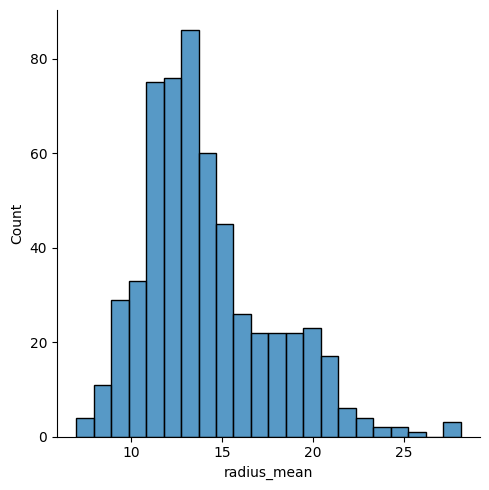

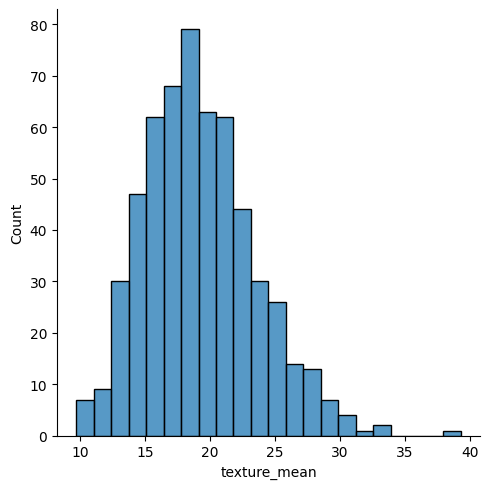

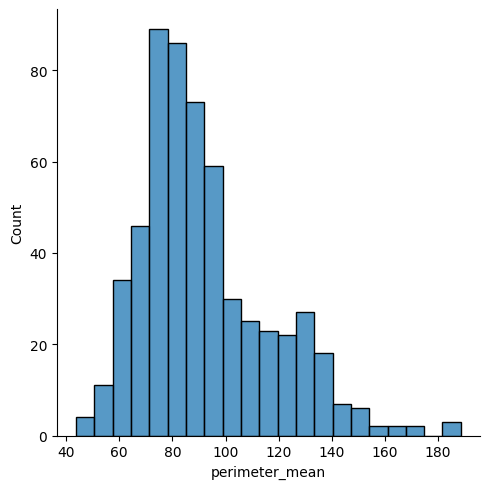

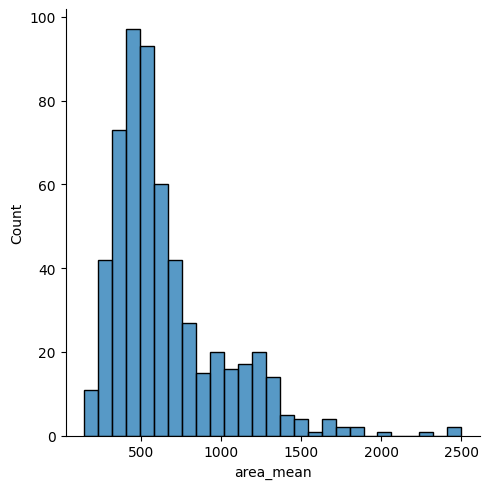

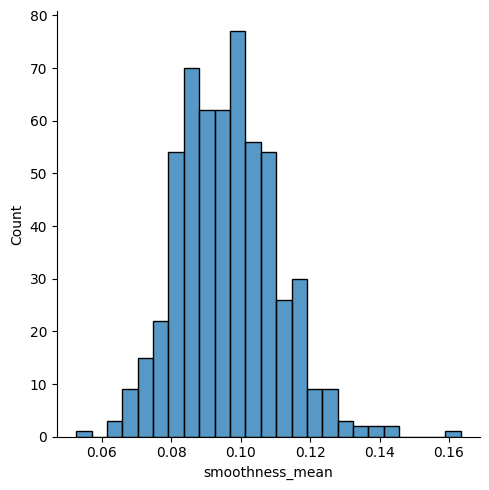

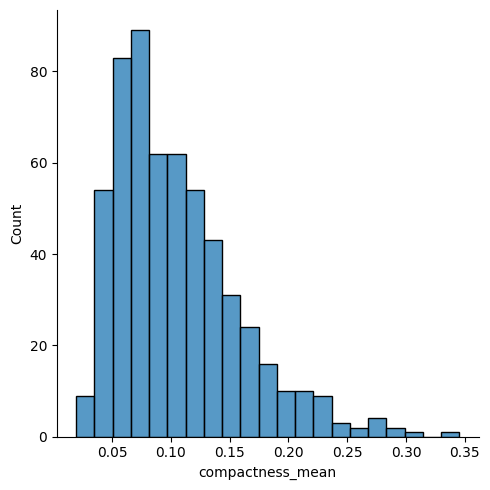

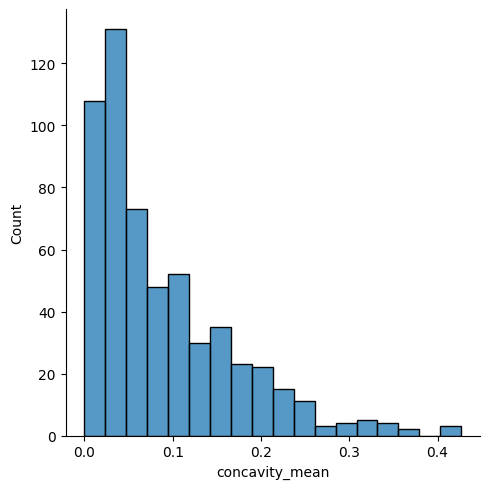

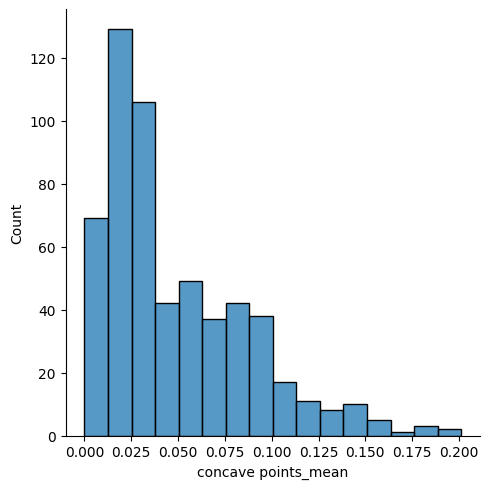

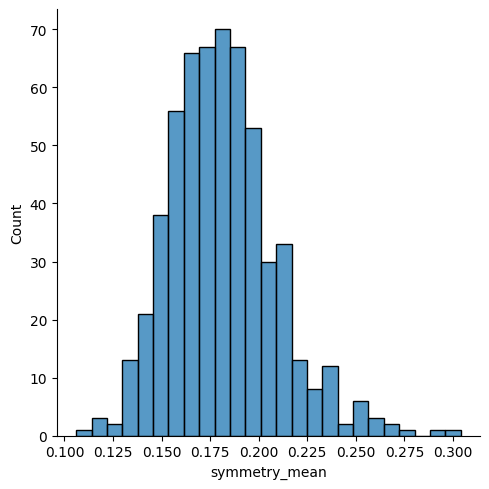

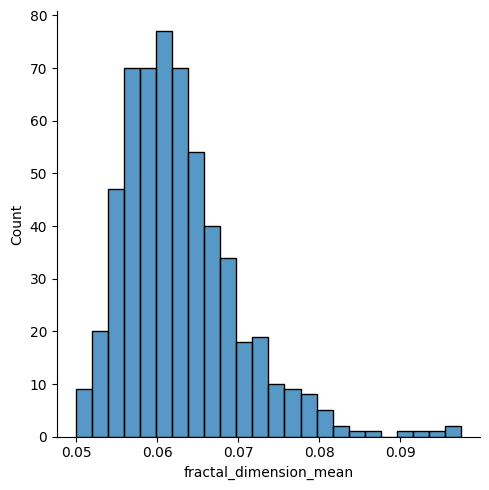

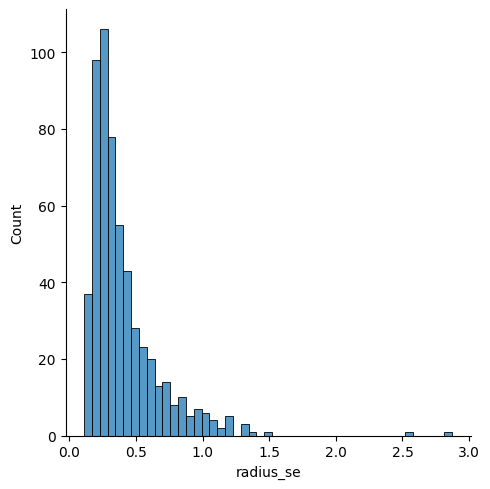

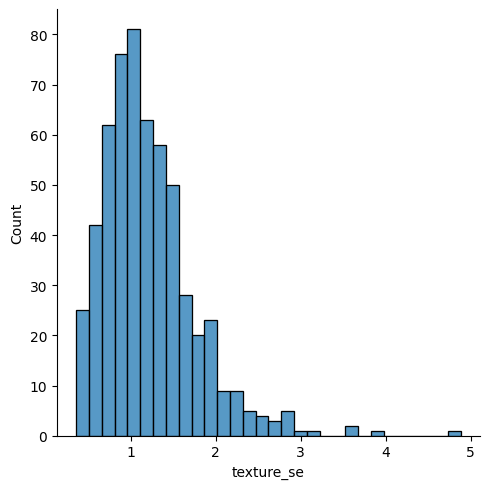

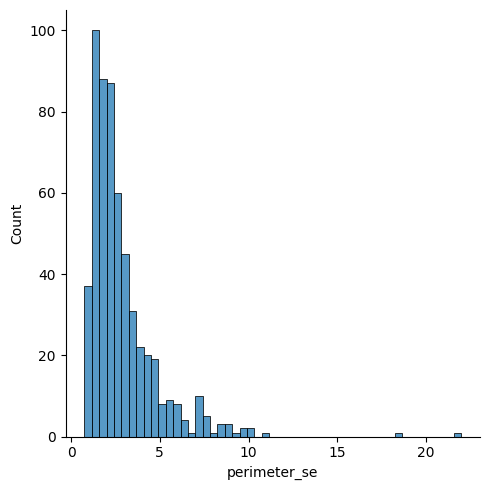

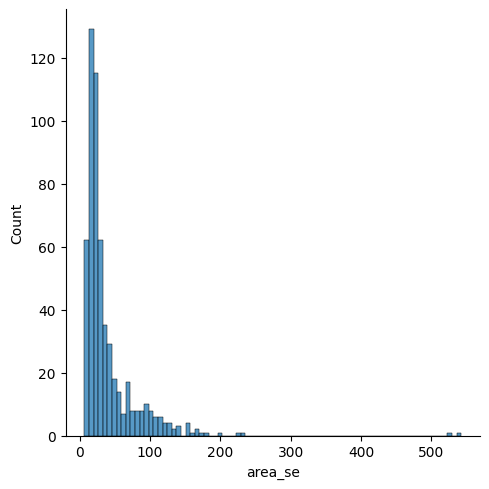

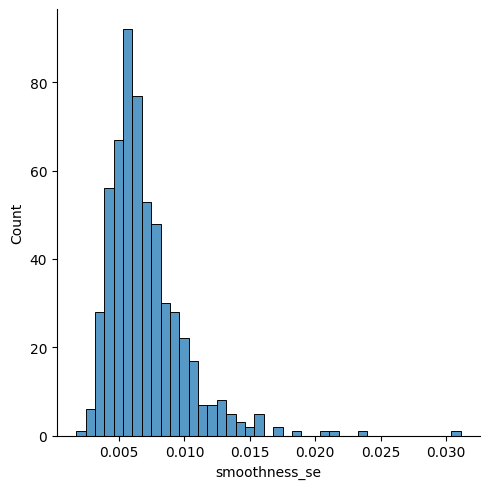

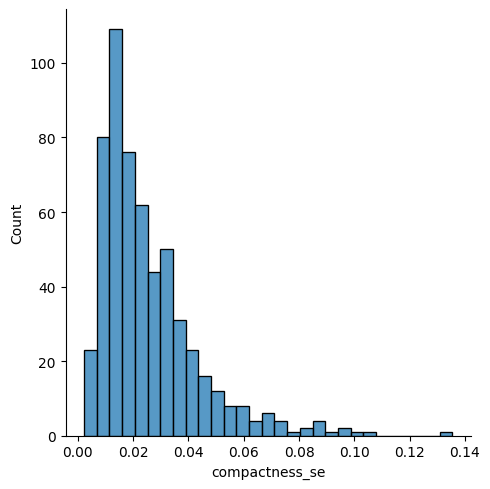

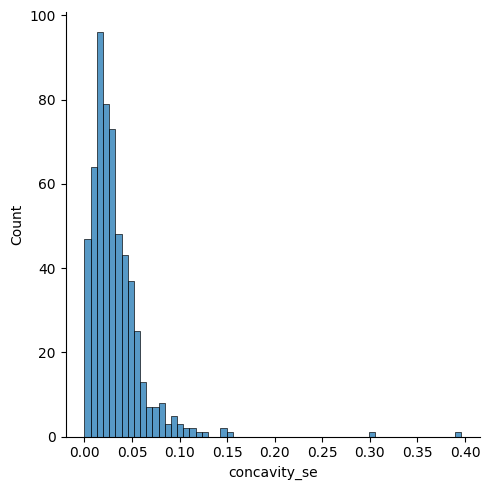

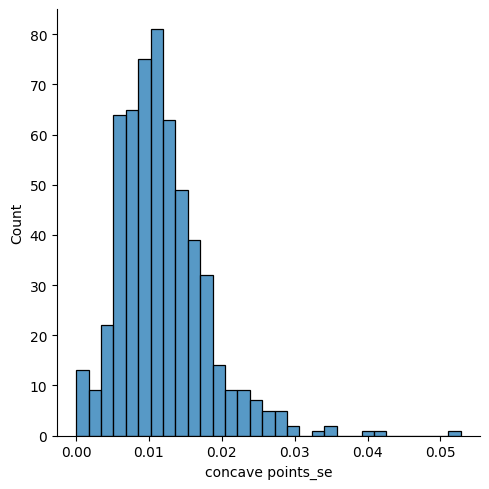

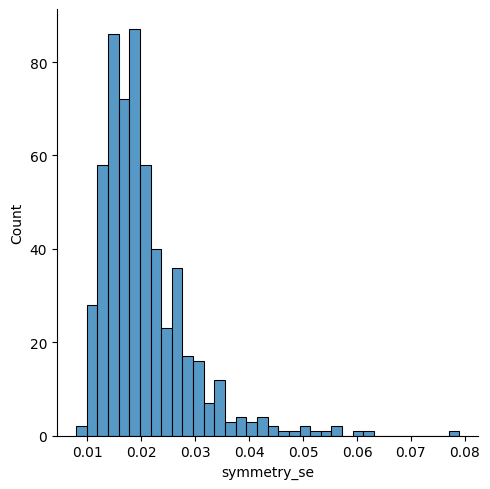

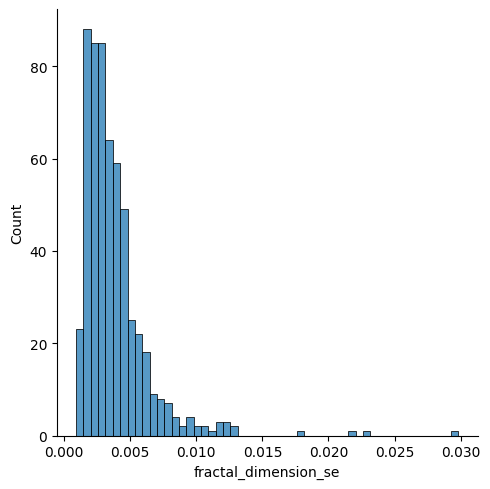

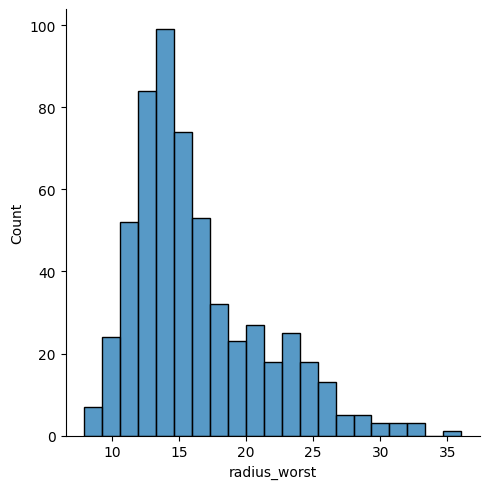

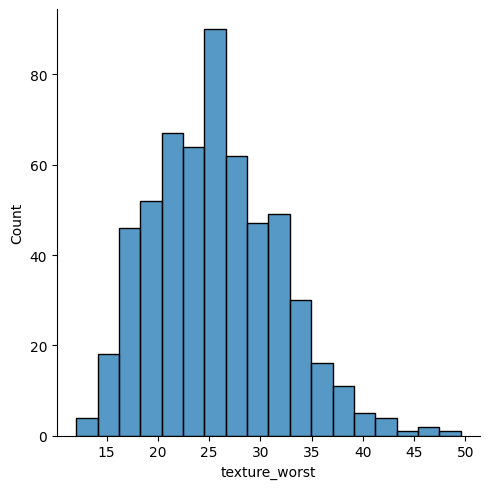

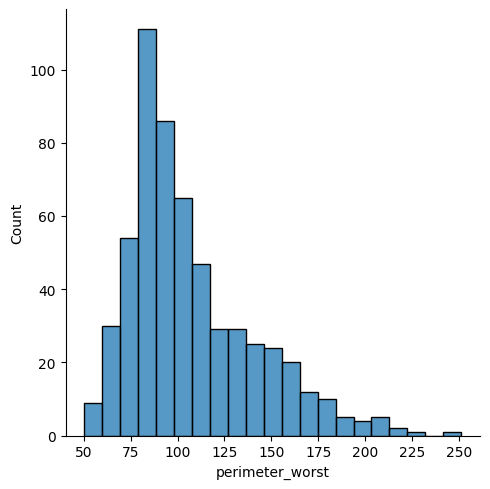

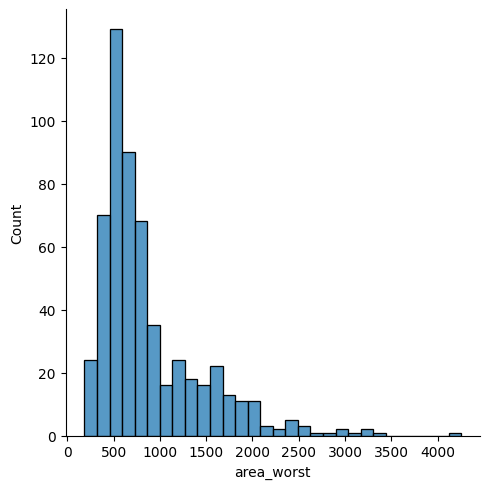

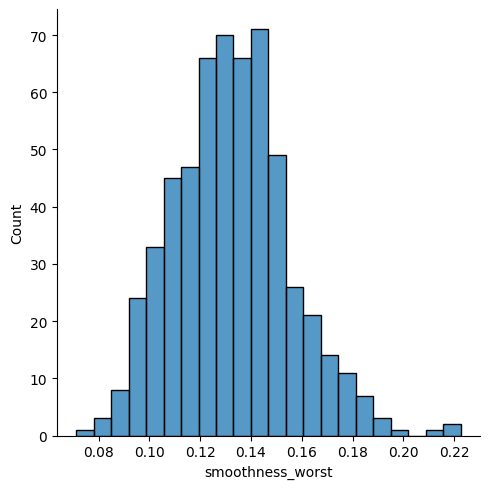

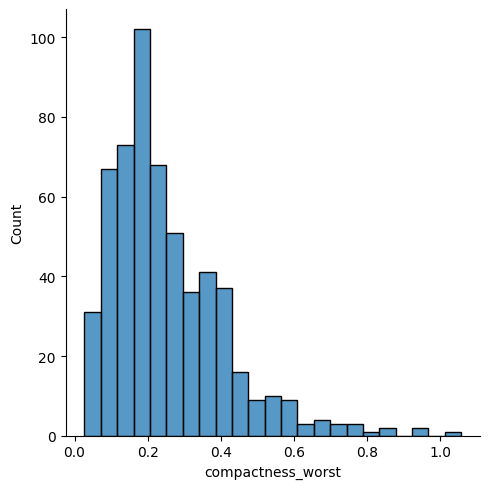

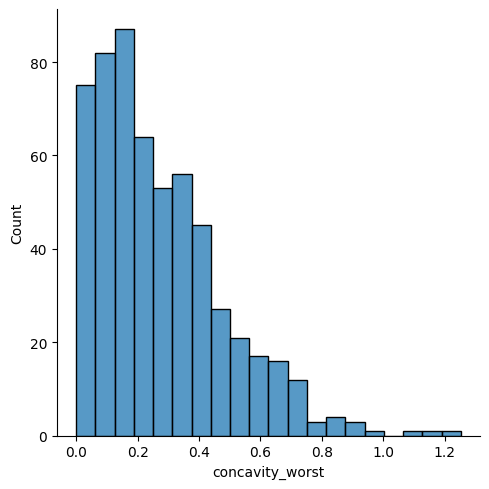

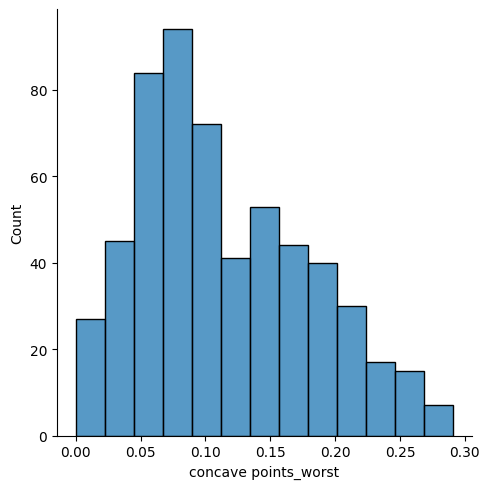

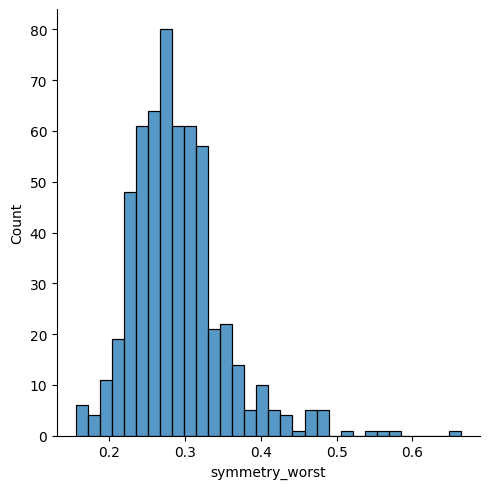

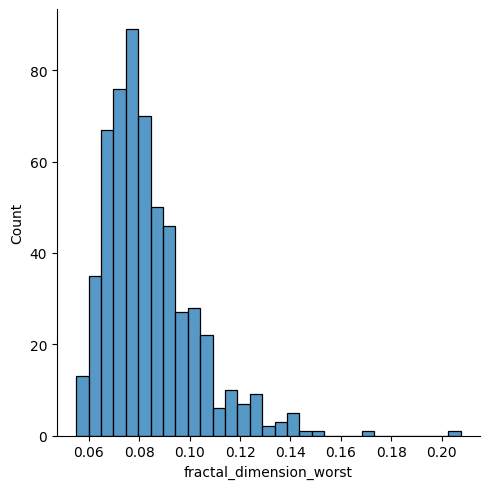

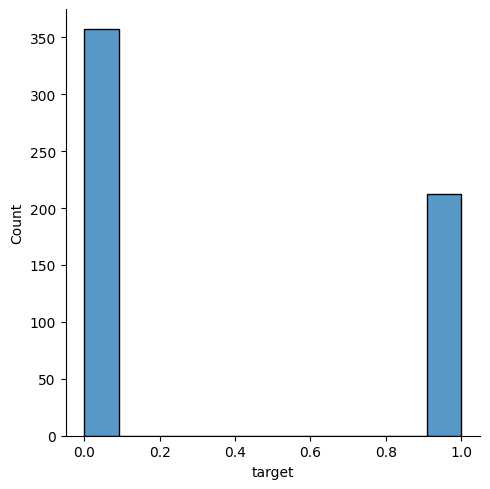

In [ ]:
# creating a for loop to get the distribution plot for all columns
for column in breast_cancer:
  sns.displot(x=column, data=breast_cancer)

<ipython-input-22-e9b445b3ab93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=breast_cancer.radius_mean)


<Axes: ylabel='Density'>

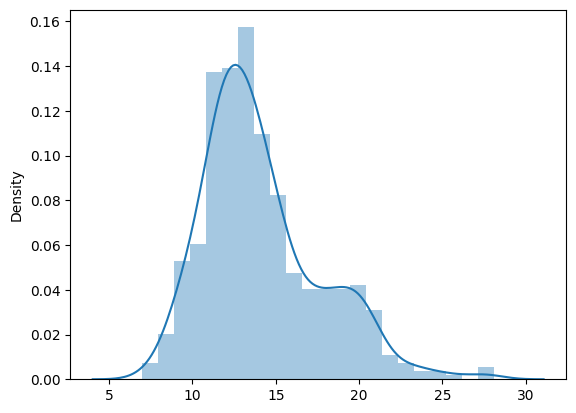

In [ ]:
sns.distplot(x=breast_cancer.radius_mean)

<ipython-input-23-e2cf1e1bcbbe>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="target", y="radius_mean",data=breast_cancer, palette="Set3", dodge=True)
<ipython-input-23-e2cf1e1bcbbe>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="target", y="fractal_dimension_mean",data=breast_cancer, palette="Set3",


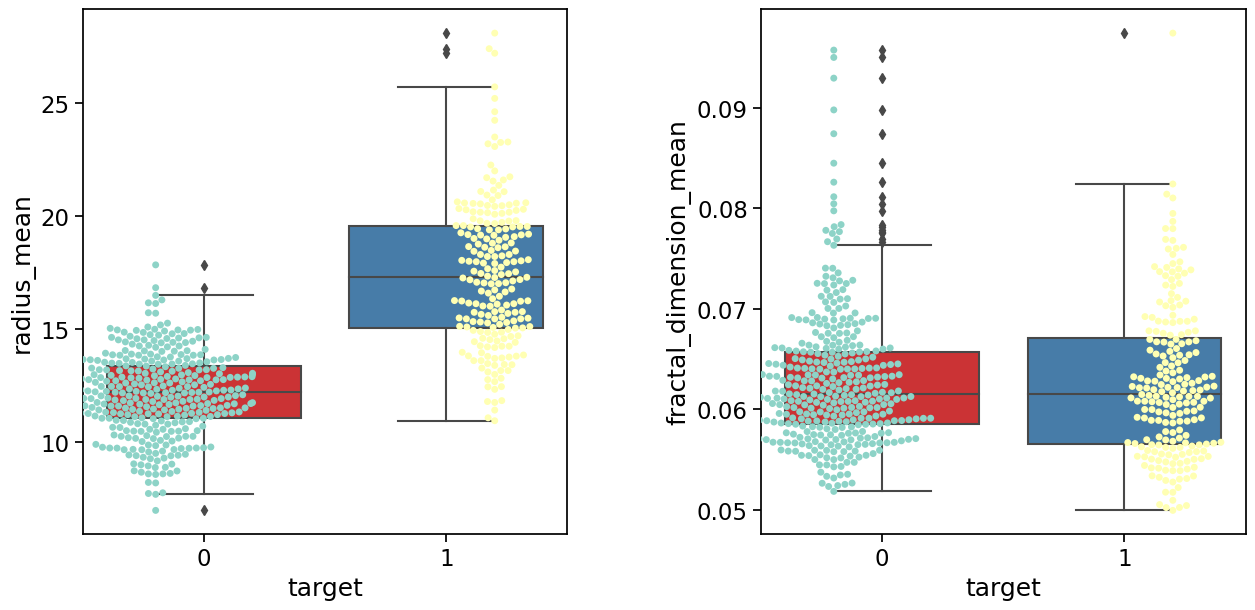

In [ ]:
plt.figure(figsize=(15,15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="radius_mean", x="target", data=breast_cancer, palette="Set1")
sns.swarmplot(x="target", y="radius_mean",data=breast_cancer, palette="Set3", dodge=True)
plt.subplot(2, 2, 2)
sns.boxplot(y="fractal_dimension_mean", x="target", data=breast_cancer, palette="Set1")
sns.swarmplot(x="target", y="fractal_dimension_mean",data=breast_cancer, palette="Set3",
              dodge=True)
plt.subplots_adjust(wspace=0.4);

**SEPARATING THE FEATURES AND TARGET**

In [ ]:
x = breast_cancer.drop(columns='target',axis=1)
y = breast_cancer['target']

In [ ]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


**SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)

SHAPE OF THE TRAIN AND TEST DATA

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (398, 30) (171, 30)


**STANDARDIZE THE DATASET**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std =  scaler.fit_transform(x_test)
print(x_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
146        11.80         16.58           78.99      432.0          0.10910   
345        10.26         14.71           66.20      321.6          0.09882   
28         15.30         25.27          102.40      732.4          0.10820   
497        12.47         17.31           80.45      480.1          0.08928   
257        15.32         17.27          103.20      713.3          0.13350   
..           ...           ...             ...        ...              ...   
440        10.97         17.20           71.73      371.5          0.08915   
165        14.97         19.76           95.50      690.2          0.08421   
7          13.71         20.83           90.20      577.9          0.11890   
219        19.53         32.47          128.00     1223.0          0.08420   
326        14.11         12.88           90.03      616.5          0.09309   

     compactness_mean  concavity_mean  concave points_mean  sym

**MACHINE LEARNING ALGORITHMS**

logistic regression: 0.9532163742690059


<Axes: >

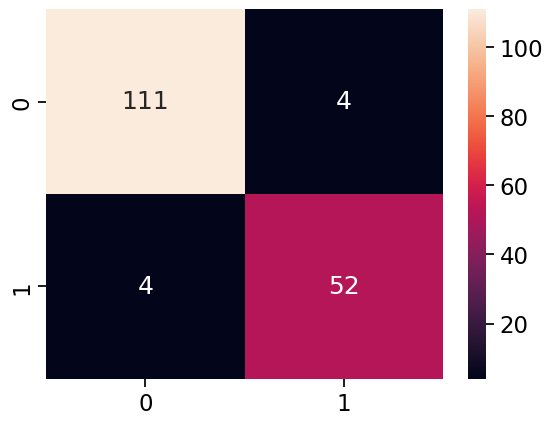

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

y_pred_lr= lr.predict(x_test)

lr_acc=accuracy_score(y_pred_lr,y_test)
print("logistic regression:",lr_acc)

lr_cm = confusion_matrix(y_pred_lr,y_test)
sns.heatmap(lr_cm,annot=True,fmt="d")

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)

SVC()

svm model accuracy: 0.9298245614035088


<Axes: >

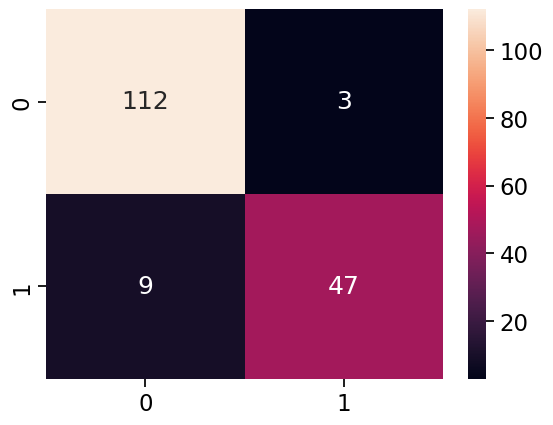

In [ ]:
ac_svm = accuracy_score(y_test,model_svm.predict(x_test))
print("svm model accuracy:",ac_svm)

cm_svm = confusion_matrix(y_test,model_svm.predict(x_test))
sns.heatmap(cm_svm,annot=True,fmt="d")

**RANDOM FOREST CLASSIFIER**

random forest model accuracy: 0.9766081871345029


<Axes: >

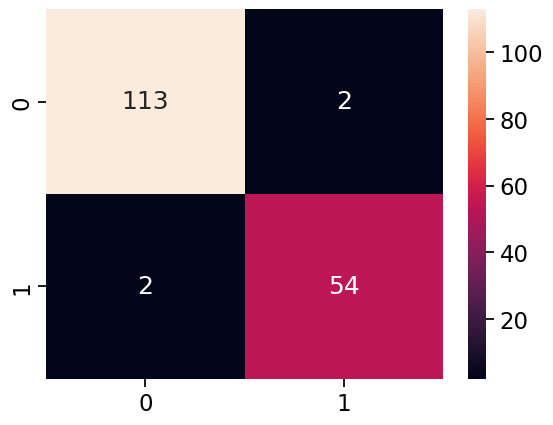

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)

rf_acc = accuracy_score(y_test,rf.predict(x_test))
print("random forest model accuracy:",rf_acc)

cm_rf = confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cm_rf,annot=True,fmt="d")

**BUILING THE NEURAL NETWORK MODEL**

IMPORTING KERAS

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

CREATING MODEL

In [ ]:
ann = Sequential()

#input layer
ann.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#hidden layer
ann.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
#output layer
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

SUMMARY OF LAYERS

In [ ]:
ann.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 20)                620       
                                                                 
 dense_31 (Dense)            (None, 10)                210       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


COMPILING THE ANN

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

FITTING THE ANN TO TRAINING SET

In [ ]:
history= ann.fit(x_train,y_train,batch_size =100,validation_split=0.1,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 47ms/step - loss: 11.5718 - accuracy: 0.2095 - val_loss: 9.6226 - val_accuracy: 0.2250
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 9.6324 - accuracy: 0.1453 - val_loss: 7.8756 - val_accuracy: 0.2250
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 7.9922 - accuracy: 0.1397 - val_loss: 6.2344 - val_accuracy: 0.2250
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 5.9681 - accuracy: 0.1760 - val_loss: 5.1126 - val_accuracy: 0.2750
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 4.8111 - accuracy: 0.2486 - val_loss: 3.6770 - val_accuracy: 0.2500
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 3.5376 - accuracy: 0.2402 - val_loss: 2.6212 - val_accuracy: 0.3000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 2.4242 - accuracy: 0.2877 - val_loss: 1.8334 - val_accuracy: 0.3500
Epoch 8/100
4/4 [======

TESTING FOR TEST DATA

In [ ]:
y_pred = ann.predict(x_test)
y_pred=(y_pred>0.5)

6/6 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print("COMFUSION MATRIX:",cm)
print("ACCURACY SCORE:",score)

COMFUSION MATRIX: [[111   4]
 [  5  51]]
ACCURACY SCORE: 0.9473684210526315


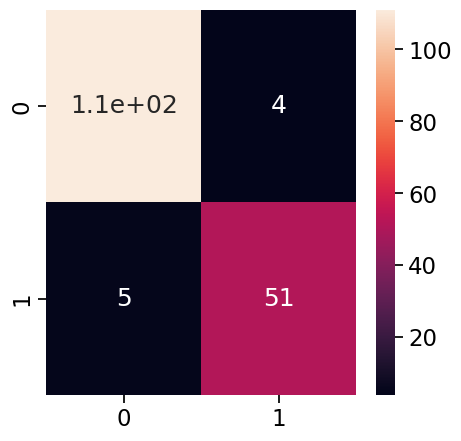

In [ ]:
#visualize confusion matrix
plt.figure(figsize=[5,5])
sns.heatmap(cm,annot=True)
plt.show()

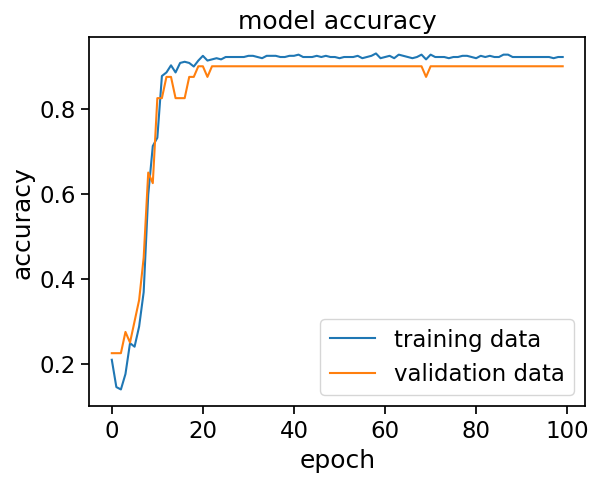

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

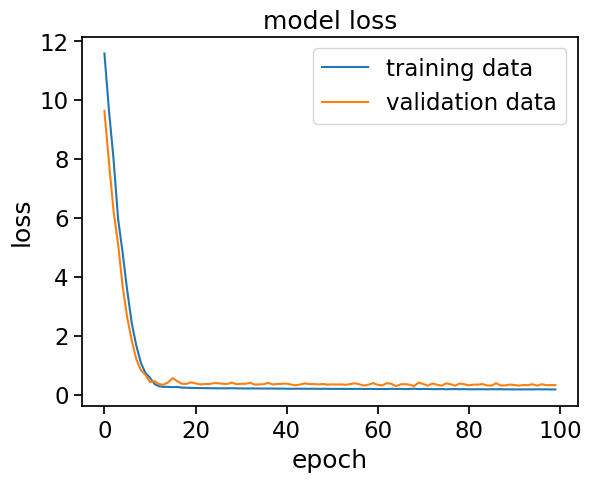

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'
                                  , 'Artificial Neural Network'
                                  ],
                        'Accuracy': [lr_acc*100, rf_acc*100, ac_svm*100, score*100
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,97.660819
0,Logistic Regression,95.321637
3,Artificial Neural Network,94.736842
2,Support Vector Machine,92.982456
